In [28]:
import numpy as np
import pandas as pd

In [29]:
df=pd.read_csv('Day028_titanic.csv')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

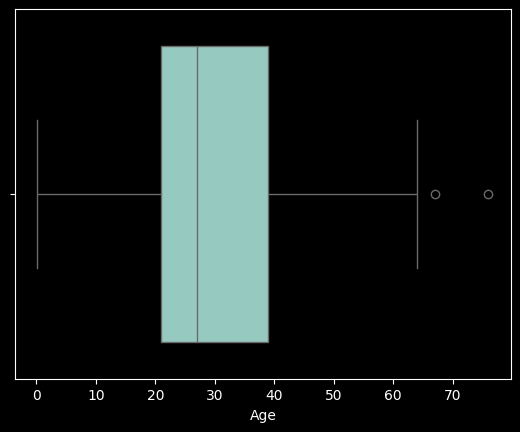

In [33]:
sns.boxplot(x=df['Age'])


In [34]:
# Finding the IRQ
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)

In [35]:
percentile25

np.float64(21.0)

In [36]:
percentile75

np.float64(39.0)

In [37]:
IQR= percentile75 - percentile25
IQR

np.float64(18.0)

In [38]:
upper_limit=percentile75+1.5*IQR
upper_limit

np.float64(66.0)

In [39]:
lower_limit=percentile75 - 1.5*IQR
lower_limit

np.float64(12.0)

In [40]:
df[df['Age']>upper_limit]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [50]:
print(df[df['Age']<lower_limit].shape)
print(df[df['Age']>upper_limit].shape)
print(df.shape)
df[df['Age']<lower_limit].head()

(23, 12)
(2, 12)
(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
80,972,0,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C
89,981,0,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,G6,S


In [42]:
# Trimming

In [43]:
newdf=df[df['Age']<upper_limit]

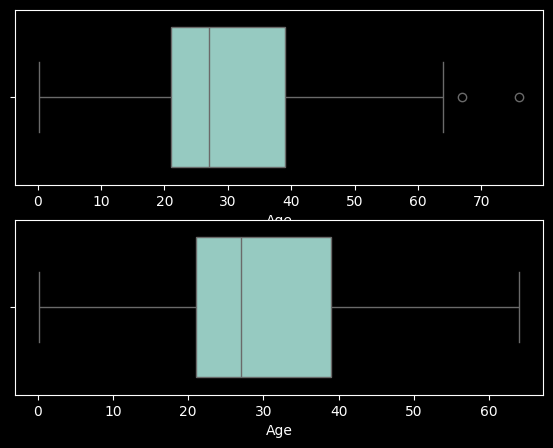

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=newdf['Age'])
plt.show()

# Capping

In [45]:
new_df_cap=df.copy()


In [46]:
new_df_cap['Age']=np.where(
    new_df_cap['Age']>upper_limit,
    upper_limit,

    np.where(
        new_df_cap['Age']<lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
)

In [47]:
new_df_cap['Age']


0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

<Axes: xlabel='Age'>

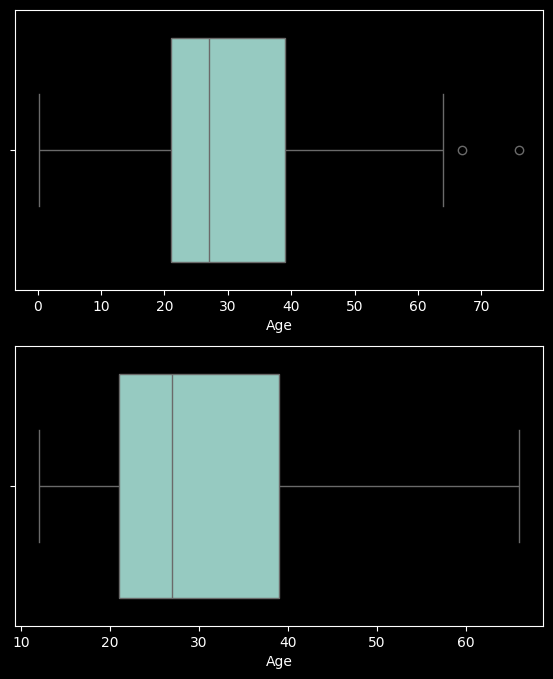

In [48]:
plt.figure(figsize=(15,8))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])